In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import os
import config
from sqlalchemy import create_engine


In [2]:
# Establish the PostgreSQL connection
connection_string = f"{config.POSTGRES_UN}:{config.POSTGRES_PW}@{config.POSTGRES_HOST}:{config.POSTGRES_PORT}/{config.POSTGRES_DB_NAME}"
engine = create_engine(f'postgresql://{connection_string}')

# Pre-work
### Since the data is synthetic there will be a lot of steps that are looked over!
- Checking for null values
    - Using Pandas I would have look for all Null/pd.NaN values in the data

* Checking column names
    * Read all of the column names and replace all leading, trailing and double spaces.
    * Check for any special characters that will cause issue when reading.
    * Replace all " " with "_".

- Checking column data types
    - Make sure all of columns are in the format that is best for Python code.
        - Dates are in correct `DateTime` format
        - Numeric values are not in `Str` objects
        - No special characters in the data

In [3]:
engine.table_names()

C:\Users\SPACE-~1\AppData\Local\Temp/ipykernel_24152/4162273999.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['boh_items', 'reciepts', 'recipes', 'servers']

,sex,sum
0,Female,1.897233e+07
1,Male,1.581709e+07
2,Other,1.564224e+07


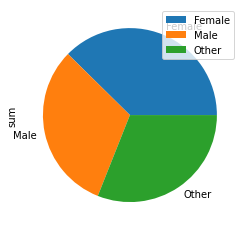

In [4]:
# Find which Sex sells the most
df = pd.read_sql_query(f"""
SELECT servers.sex, sum(reciepts.total)
FROM reciepts, servers
WHERE servers.id = reciepts.server_id
GROUP BY servers.sex
ORDER BY sum(reciepts.total) DESC;
""", con=engine)
df['sex'] = df['sex'].replace(1, 'Male').replace(2, 'Female').replace(3, 'Other')
df.set_index('sex').plot.pie(y='sum')
df

In [5]:
# Find which Sex sells the most
df = pd.read_sql_query(f"""
SELECT recipe, price_to_create_dish
FROM recipes;
""", con=engine)
df.head()

,recipe,price_to_create_dish
0,"37, 31, 48, 28, 48, 23, 8, 10, 26, 43, 31, 31,...",128.33
1,"1, 21, 23, 33, 28, 27, 21, 42, 17, 35, 12, 35,...",70.55
2,"9, 11, 15, 2, 3, 50, 30, 6, 29, 21, 3, 50, 24,...",123.78
3,"9, 3, 47, 3, 43, 40, 3, 39, 31, 10, 50, 4, 28,...",186.28
4,"8, 38, 10, 42, 45, 36, 8, 42, 38, 42, 18, 30, ...",155.05


In [6]:
# Can confirm that there are no duplicate recipes in the recipe book for the restaurant
df[df['recipe'].duplicated() == True]

,recipe,price_to_create_dish


In [7]:
df.sort_values(by='price_to_create_dish', ascending=False).head()

,recipe,price_to_create_dish
13,"26, 36, 3, 19, 11, 14, 10, 26, 11, 30, 36, 50,...",279.57
32,"38, 24, 14, 11, 45, 49, 15, 20, 18, 15, 50, 25...",247.49
26,"17, 21, 17, 25, 37, 41, 18, 40, 6, 19, 27, 29,...",235.02
40,"11, 13, 35, 45, 33, 1, 35, 36, 4, 42, 14, 4, 4...",231.33
23,"12, 42, 23, 44, 15, 46, 6, 3, 49, 7, 21, 37, 3...",227.71


In [26]:
df['recipe_items'] = [len(x.split(',')) for x in df['recipe'].tolist()]
df.sort_values(by='recipe_items', ascending=True).head(20)

,recipe,price_to_create_dish,recipe_items
19,"27, 32, 49",19.30,3
43,"2, 34, 49, 19, 35, 32",37.04,6
14,"50, 44, 38, 30, 25, 1",23.24,6
16,"14, 19, 48, 24, 13, 26",25.08,6
6,"39, 34, 35, 50, 29, 27, 38, 38, 8",33.81,9
41,"26, 12, 19, 6, 10, 47, 17, 41, 38, 22, 50",54.97,11
21,"40, 25, 35, 32, 43, 24, 1, 31, 47, 37, 23",53.63,11
22,"32, 20, 20, 39, 31, 19, 48, 26, 33, 49, 13, 3, 46",68.68,13
1,"1, 21, 23, 33, 28, 27, 21, 42, 17, 35, 12, 35,...",70.55,14
29,"34, 30, 6, 8, 17, 45, 24, 5, 7, 39, 33, 38, 13...",88.56,15


In [11]:
# Windows 11 home 2.2.8.2 
# Need 2.1.8.2
# Remote Connect 

In [20]:
recipe_items = []
for x in df['recipe'].tolist():
    for y in x.replace(" ", '').split(','):
        if y not in recipe_items:
            recipe_items.append(y)


<AxesSubplot:>

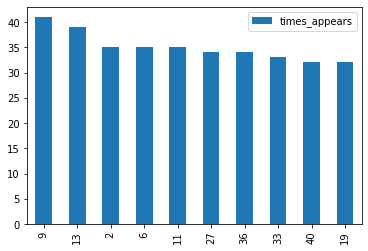

In [40]:
# Display the top 10 ingrediants that appear in every recipe
times = []
for x in recipe_items:
    appears = 0
    for y in df['recipe'].tolist():
        for z in y.replace(' ', '').split(','):
            if x == z:
                appears += 1
    times.append(appears)
pd.DataFrame({
    'id': recipe_items,
    'times_appears': times
}).sort_values(by='times_appears', ascending=False).head(10).plot.bar()